In [28]:
import json
from datasets import load_dataset, load_from_disk
from datasets import get_dataset_config_names
import matplotlib.pyplot as plt

In [2]:
print(get_dataset_config_names("openfoodfacts/product-database"))

['default']


In [21]:
ds = load_dataset("openfoodfacts/product-database", split="food")

Generating food split: 4039978 examples [00:19, 202332.05 examples/s]
Generating beauty split: 57325 examples [00:00, 82278.85 examples/s]


In [ ]:
ds.save_to_disk("../../data/raw/openfoodfacts_food_dataset")

Saving the dataset (54/54 shards): 100%|██████████| 4039978/4039978 [02:21<00:00, 28573.84 examples/s]


In [55]:
ds = load_from_disk("../../data/raw/openfoodfacts_food_dataset")

In [56]:
print(ds)

Dataset({
    features: ['additives_n', 'additives_tags', 'allergens_tags', 'brands_tags', 'brands', 'categories', 'categories_tags', 'categories_properties', 'checkers_tags', 'ciqual_food_name_tags', 'cities_tags', 'code', 'compared_to_category', 'complete', 'completeness', 'correctors_tags', 'countries_tags', 'created_t', 'creator', 'data_quality_errors_tags', 'data_quality_info_tags', 'data_quality_warnings_tags', 'data_sources_tags', 'ecoscore_data', 'ecoscore_grade', 'ecoscore_score', 'ecoscore_tags', 'editors', 'emb_codes_tags', 'emb_codes', 'entry_dates_tags', 'food_groups_tags', 'generic_name', 'images', 'informers_tags', 'ingredients_analysis_tags', 'ingredients_from_palm_oil_n', 'ingredients_n', 'ingredients_original_tags', 'ingredients_percent_analysis', 'ingredients_tags', 'ingredients_text', 'ingredients_with_specified_percent_n', 'ingredients_with_unspecified_percent_n', 'ingredients_without_ciqual_codes_n', 'ingredients_without_ciqual_codes', 'ingredients', 'known_ingred

In [26]:
#List all the features in the dataset
for feature, dtype in ds.features.items():
    print(f"{feature}: {dtype}")

additives_n: Value('int32')
additives_tags: List(Value('string'))
allergens_tags: List(Value('string'))
brands_tags: List(Value('string'))
brands: Value('string')
categories: Value('string')
categories_tags: List(Value('string'))
categories_properties: {'ciqual_food_code': Value('int32'), 'agribalyse_food_code': Value('int32'), 'agribalyse_proxy_food_code': Value('int32')}
checkers_tags: List(Value('string'))
ciqual_food_name_tags: List(Value('string'))
cities_tags: List(Value('string'))
code: Value('string')
compared_to_category: Value('string')
complete: Value('int32')
completeness: Value('float32')
correctors_tags: List(Value('string'))
countries_tags: List(Value('string'))
created_t: Value('int64')
creator: Value('string')
data_quality_errors_tags: List(Value('string'))
data_quality_info_tags: List(Value('string'))
data_quality_warnings_tags: List(Value('string'))
data_sources_tags: List(Value('string'))
ecoscore_data: Value('string')
ecoscore_grade: Value('string')
ecoscore_score:

In [34]:
# Select first 50 records
subset = ds.select(range(500))

# Filter for those with non-null 'images'
samples_with_images = [record for record in subset if record['nutriments'] is None][:5]

print(samples_with_images)

[{'additives_n': None, 'additives_tags': None, 'allergens_tags': [], 'brands_tags': None, 'brands': None, 'categories': 'Viandes et dérivés, Viandes, Volailles, Dinde et dérivés, Dindes, Escalopes de dinde', 'categories_tags': ['en:meats-and-their-products', 'en:meats', 'en:poultries', 'en:turkey-and-its-products', 'en:turkeys', 'en:turkey-cutlets'], 'categories_properties': {'ciqual_food_code': 36304, 'agribalyse_food_code': 36304, 'agribalyse_proxy_food_code': None}, 'checkers_tags': [], 'ciqual_food_name_tags': ['turkey-escalope-raw'], 'cities_tags': None, 'code': '0000130008136', 'compared_to_category': 'en:turkey-cutlets', 'complete': 0, 'completeness': 0.30000001192092896, 'correctors_tags': [], 'countries_tags': ['en:france'], 'created_t': 1536580715, 'creator': 'date-limite-app', 'data_quality_errors_tags': [], 'data_quality_info_tags': ['en:no-packaging-data', 'en:environmental-score-extended-data-not-computed', 'en:food-groups-1-known', 'en:food-groups-2-known', 'en:food-grou

In [37]:
print(type(samples_with_images[0]['nutriments']))

<class 'NoneType'>


In [12]:
samples_with_images[0]['code']

'0000527000057'

In [31]:
print(samples_with_images[1]['code'])
print(samples_with_images[1]['images'])

0000111301201
[{'key': '1', 'imgid': None, 'rev': None, 'sizes': {'100': {'h': 100, 'w': 93}, '200': None, '400': {'h': 400, 'w': 373}, 'full': {'h': 1668, 'w': 1555}}, 'uploaded_t': 1632611836, 'uploader': 'openfoodfacts-contributors'}, {'key': 'ingredients_en', 'imgid': 1, 'rev': 5, 'sizes': {'100': {'h': 100, 'w': 93}, '200': {'h': 200, 'w': 186}, '400': {'h': 400, 'w': 373}, 'full': {'h': 1668, 'w': 1555}}, 'uploaded_t': None, 'uploader': None}]


In [32]:
print(samples_with_images[2]['code'])
print(samples_with_images[2]['images'])

0000140323687
[{'key': '2', 'imgid': None, 'rev': None, 'sizes': {'100': {'h': 57, 'w': 100}, '200': None, '400': {'h': 229, 'w': 400}, 'full': {'h': 1200, 'w': 2095}}, 'uploaded_t': 1535364792, 'uploader': 'kiliweb'}, {'key': 'ingredients_fr', 'imgid': 2, 'rev': 7, 'sizes': {'100': {'h': 57, 'w': 100}, '200': {'h': 115, 'w': 200}, '400': {'h': 229, 'w': 400}, 'full': {'h': 1200, 'w': 2095}}, 'uploaded_t': None, 'uploader': None}, {'key': 'front_fr', 'imgid': 1, 'rev': 4, 'sizes': {'100': {'h': 100, 'w': 84}, '200': {'h': 200, 'w': 168}, '400': {'h': 400, 'w': 336}, 'full': {'h': 1200, 'w': 1007}}, 'uploaded_t': None, 'uploader': None}, {'key': '1', 'imgid': None, 'rev': None, 'sizes': {'100': {'h': 100, 'w': 84}, '200': None, '400': {'h': 400, 'w': 336}, 'full': {'h': 1200, 'w': 1007}}, 'uploaded_t': 1535364770, 'uploader': 'kiliweb'}]


In [2]:
#load processed dataset
ds = load_from_disk("/Users/bhushanshah/Documents/food-fact-check/data/processed/openfoodfacts_food_dataset")

In [3]:
samples = ds.select(range(50))

In [5]:
# Print all the features in the dataset
for feature, dtype in ds.features.items():
    print(f"{feature}: {dtype}")

additives_n: Value('int32')
additives_tags: List(Value('string'))
brands: Value('string')
code: Value('string')
compared_to_category: Value('string')
images: List({'key': Value('string'), 'imgid': Value('int32'), 'rev': Value('int32'), 'sizes': {'100': {'h': Value('int32'), 'w': Value('int32')}, '200': {'h': Value('int32'), 'w': Value('int32')}, '400': {'h': Value('int32'), 'w': Value('int32')}, 'full': {'h': Value('int32'), 'w': Value('int32')}}, 'uploaded_t': Value('int64'), 'uploader': Value('string')})
ingredients_analysis_tags: List(Value('string'))
ingredients_tags: List(Value('string'))
ingredients_text: List({'lang': Value('string'), 'text': Value('string')})
lang: Value('string')
languages_tags: List(Value('string'))
minerals_tags: List(Value('string'))
nutrient_levels_tags: List(Value('string'))
nutriments: List({'name': Value('string'), 'value': Value('float32'), '100g': Value('float32'), 'serving': Value('float32'), 'unit': Value('string'), 'prepared_value': Value('float32'

In [6]:
#print the image urls
for sample in samples:
    print(sample['image_url'])

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
https://images.openfoodfacts.org/images/products/000/015/948/7776/front_en.3.full.jpg
None
None
None
https://images.openfoodfacts.org/images/products/000/020/428/6484/front_de.3.full.jpg
None
None
None
https://images.openfoodfacts.org/images/products/000/025/063/2969/front_de.3.full.jpg
None
None
None
None
None
None
None
https://images.openfoodfacts.org/images/products/000/041/701/2009/front_ru.3.full.jpg
None
None
None
None
None
None
None
None
https://images.openfoodfacts.org/images/products/000/046/093/8714/front_de.3.full.jpg
https://images.openfoodfacts.org/images/products/000/047/032/2800/front_de.3.full.jpg
https://images.openfoodfacts.org/images/products/000/050/105/0603/front_de.3.full.jpg
None
https://images.openfoodfacts.org/images/products/000/052/693/8306/front_de.3.full.jpg
None
https://images.openfoodfacts.org/images/products/000/055/400/4509/front_fr.4.full.jpg
None


In [43]:
ds.features

{'additives_n': Value('int32'),
 'additives_tags': List(Value('string')),
 'allergens_tags': List(Value('string')),
 'brands_tags': List(Value('string')),
 'brands': Value('string'),
 'categories': Value('string'),
 'categories_tags': List(Value('string')),
 'categories_properties': {'ciqual_food_code': Value('int32'),
  'agribalyse_food_code': Value('int32'),
  'agribalyse_proxy_food_code': Value('int32')},
 'checkers_tags': List(Value('string')),
 'ciqual_food_name_tags': List(Value('string')),
 'cities_tags': List(Value('string')),
 'code': Value('string'),
 'compared_to_category': Value('string'),
 'complete': Value('int32'),
 'completeness': Value('float32'),
 'correctors_tags': List(Value('string')),
 'countries_tags': List(Value('string')),
 'created_t': Value('int64'),
 'creator': Value('string'),
 'data_quality_errors_tags': List(Value('string')),
 'data_quality_info_tags': List(Value('string')),
 'data_quality_warnings_tags': List(Value('string')),
 'data_sources_tags': List(

In [47]:
#search for a sample in ds with code 3017620422003
for sample in ds:
    if sample['code'] == '8852018101055':
        print(sample)
        break

{'additives_n': 12, 'additives_tags': ['en:e150c', 'en:e160c', 'en:e296', 'en:e306', 'en:e319', 'en:e330', 'en:e451', 'en:e452', 'en:e466', 'en:e500', 'en:e621', 'en:e635'], 'brands': 'Yum Yum', 'code': '8852018101055', 'compared_to_category': 'en:dehydrated-asian-style-soup-with-noodles', 'images': [{'key': '37', 'imgid': None, 'rev': None, 'sizes': {'100': {'h': 30, 'w': 100}, '200': None, '400': {'h': 120, 'w': 400}, 'full': {'h': 484, 'w': 1620}}, 'uploaded_t': 1708788910, 'uploader': 'gourmet'}, {'key': '10', 'imgid': None, 'rev': None, 'sizes': {'100': {'h': 37, 'w': 100}, '200': None, '400': {'h': 149, 'w': 400}, 'full': {'h': 1200, 'w': 3225}}, 'uploaded_t': 1525447555, 'uploader': 'kiliweb'}, {'key': '13', 'imgid': None, 'rev': None, 'sizes': {'100': {'h': 74, 'w': 100}, '200': None, '400': {'h': 295, 'w': 400}, 'full': {'h': 1200, 'w': 1629}}, 'uploaded_t': 1578780558, 'uploader': 'kiliweb'}, {'key': '14', 'imgid': None, 'rev': None, 'sizes': {'100': {'h': 50, 'w': 100}, '200

In [9]:
for sample in samples:
    print(sample['ingredients_tags'])

['en:camomile-flower', 'en:herb', 'en:camomile']
['en:peppermint', 'en:herb', 'en:mint']
['en:linden-flowers']
['en:roselle-flower', 'en:plant']
['en:tea', 'en:plant', 'en:cinnamon', 'en:condiment', 'en:spice', 'en:natural-apple-flavouring', 'en:flavouring', 'en:natural-flavouring']
['en:green-tea', 'en:plant', 'en:tea']
['en:shave-grass']
['en:chamomile-spearmint']
['en:artichoke-malva-senna-leaf-hibiscus-chamomile-natural-apple-flavor']
['en:andropogon-citratus', 'en:uva-ursi', 'en:roselle-flower', 'en:plant', 'en:cinnamon', 'en:condiment', 'en:spice', 'en:equisetum-arvense', 'en:flourensia-cernua']
['en:shave-grass', 'en:corn-silk', 'en:uva-ursi', 'en:juliana-adstringen', 'en:boldo', 'en:roselle-flower', 'en:plant', 'en:orange-blossom']
['en:eucalyptus-licorice-ginger-elder-mullein-cinnamon-orange-blossom']
['en:canola-oil-no-additives', 'en:preservative']
['en:canola-oil', 'en:oil-and-fat', 'en:vegetable-oil-and-fat', 'en:rapeseed-oil', 'en:water', 'en:palm-oil', 'en:palm-oil-and-f

In [10]:
for sample in samples:
    print(sample['additives_tags'])

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['en:e202', 'en:e322', 'en:e322i', 'en:e330', 'en:e471']
['en:e202', 'en:e322', 'en:e322i', 'en:e330', 'en:e385', 'en:e471']
[]
['en:e322', 'en:e322i']
['en:e322', 'en:e322i']
['en:e160a', 'en:e160ai', 'en:e500', 'en:e500ii', 'en:e503', 'en:e503ii']
['en:e322', 'en:e322i', 'en:e450', 'en:e450i', 'en:e500', 'en:e500ii']
['en:e529']
[]
[]
['en:e280', 'en:e281', 'en:e322', 'en:e322i', 'en:e338', 'en:e435', 'en:e472e', 'en:e924a']
['en:e260', 'en:e270']
[]
['en:e322']
['en:e1103', 'en:e322', 'en:e330']
['en:e102', 'en:e211', 'en:e222', 'en:e433']
[]
['en:e341', 'en:e341ii', 'en:e414', 'en:e420', 'en:e422', 'en:e500', 'en:e500ii', 'en:e903', 'en:e965', 'en:e965ii', 'en:e967']
['en:e322', 'en:e322i', 'en:e341', 'en:e341ii', 'en:e420', 'en:e422', 'en:e500', 'en:e500ii', 'en:e903', 'en:e965', 'en:e965ii', 'en:e967']
['en:e322', 'en:e322i']
['en:e322', 'en:e322i']
['en:e322', 'en:e322i']
['en:e120', 'en:e133', 'en:e420']
[]
[]
['en:e500', 'en:e500ii']
['en

In [11]:
for sample in samples:
    print(sample['minerals_tags'])

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['en:calcium', 'en:iron']
['en:calcium', 'en:iron']
[]
[]
[]
['en:ferrous-sulfate', 'en:calcium-sulfate']
['en:ferrous-sulfate']
[]
[]
[]
['en:calcium-chloride']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['en:potassium-iodate']
[]


In [12]:
for sample in samples:
    print(sample['nutriments'])

[{'name': 'fruits-vegetables-legumes-estimate-from-ingredients', 'value': None, '100g': 100.0, 'serving': 100.0, 'unit': None, 'prepared_value': None, 'prepared_100g': None, 'prepared_serving': None, 'prepared_unit': None}, {'name': 'fat', 'value': 0.0, '100g': None, 'serving': 0.0, 'unit': 'g', 'prepared_value': None, 'prepared_100g': None, 'prepared_serving': None, 'prepared_unit': None}, {'name': 'potassium', 'value': 3200.0, '100g': None, 'serving': 3.200000047683716, 'unit': 'mg', 'prepared_value': None, 'prepared_100g': None, 'prepared_serving': None, 'prepared_unit': None}, {'name': 'energy-kcal', 'value': 280.0, '100g': None, 'serving': 280.0, 'unit': 'kcal', 'prepared_value': None, 'prepared_100g': None, 'prepared_serving': None, 'prepared_unit': None}, {'name': 'sodium', 'value': 300.0, '100g': None, 'serving': 0.30000001192092896, 'unit': 'mg', 'prepared_value': None, 'prepared_100g': None, 'prepared_serving': None, 'prepared_unit': None}, {'name': 'proteins', 'value': 0.0, 

In [30]:
constituents_path = "../../data/all_lang_constituents.json"
with open(constituents_path, 'r') as f:
    constituents = json.load(f)

In [31]:
ingredients = constituents['ingredients']
languages = set()
for ing in ingredients:
    lang = ing.split(':')[0]
    languages.add(lang)

In [32]:
print("The number of unique languages in ingredients is:", len(languages))

The number of unique languages in ingredients is: 89


In [16]:
print("Languages set: ", languages)

Languages set:  {'', 'ne', 'mo', 'te', 'so', 'et', 'id', 'tl', 'fr', 'es', 'ky', 'it', 'uz', 'iw', 'tr', 'da', 'ku', 'tt', 'se', 'fy', 'ga', 'bg', 'am', 'ig', 'to', 'hr', 'sr', 'xx', 'ca', 'cy', 'mr', 'ms', 'hy', 'is', 'ja', 'ro', 'mk', 'co', 'ty', 'fa', 'sv', 'eo', 'ko', 'zh', 'fi', 'sq', 'uk', 'ka', 'bs', 'pl', 'af', 'my', 'gl', 'sk', 'ur', 'ba', 'hi', 'rn', 'lb', 'ar', 'th', 'de', 'mn', 'pt', 'az', 'lv', 'en', 'in', 'lt', 'as', 'vi', 'no', 'hu', 'gd', 'nl', 'nb', 'mg', 'km', 'sl', 'he', 'bn', 'ee', 'ru', 'eu', 'be', 'la', 'el', 'aa', 'cs'}


In [33]:
constituents_path = "../../data/constituents.json"
with open(constituents_path, 'r') as f:
    constituents = json.load(f)

In [24]:
print("Number of ingredients in English:", len(constituents['ingredients']))
print("Number of additives in English:", len(constituents['additives']))
print("Number of minerals in English:", len(constituents['minerals']))
print("Number of nutriments in English:", len(constituents['nutriments']))

Number of ingredients in English: 396478
Number of additives in English: 615
Number of minerals in English: 123
Number of nutriments in English: 2286


In [49]:
ingredients = constituents['ingredients']
additives = constituents['additives']
minerals = constituents['minerals']
nutriments = constituents['nutriments']

In [50]:
count = 0
for key, value in ingredients.items():
    print(f"{key}: {value}")
    count += 1
    if count >= 10:
        break

en:camomile-flower: 158
en:herb: 96637
en:camomile: 860
en:peppermint: 2125
en:mint: 5422
en:linden-flowers: 25
en:roselle-flower: 2711
en:plant: 168080
en:tea: 9226
en:cinnamon: 18390


396478


(array([3.95316e+05, 3.52000e+02, 1.69000e+02, 8.60000e+01, 6.40000e+01,
        4.90000e+01, 3.60000e+01, 2.50000e+01, 1.70000e+01, 2.70000e+01,
        2.30000e+01, 1.40000e+01, 1.70000e+01, 8.00000e+00, 1.00000e+01,
        8.00000e+00, 9.00000e+00, 1.10000e+01, 1.30000e+01, 1.10000e+01,
        1.00000e+01, 7.00000e+00, 1.50000e+01, 4.00000e+00, 4.00000e+00,
        1.10000e+01, 2.00000e+00, 2.00000e+00, 4.00000e+00, 4.00000e+00,
        3.00000e+00, 2.00000e+00, 3.00000e+00, 3.00000e+00, 3.00000e+00,
        7.00000e+00, 5.00000e+00, 2.00000e+00, 4.00000e+00, 2.00000e+00,
        4.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        3.00000e+00, 2.00000e+00, 4.00000e+00, 4.00000e+00, 2.00000e+00,
        2.00000e+00, 3.00000e+00, 2.00000e+00, 3.00000e+00, 3.00000e+00,
        1.00000e+00, 4.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 3.00000e+00, 2.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00

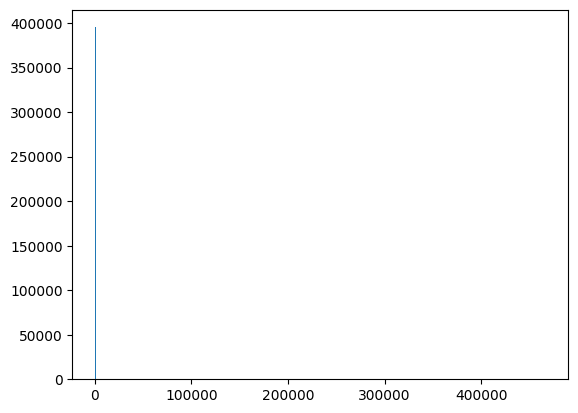

In [66]:
ingredients_counts = ingredients.values()
print(len(ingredients_counts))
plt.hist(ingredients_counts, bins=500)

In [67]:
ingredients_counts = sorted(ingredients_counts)
ingredients_counts = ingredients_counts[(len(ingredients_counts) // 10) * 9:int(len(ingredients_counts) * 0.99)]

(array([10584.,  7509.,  2318.,  3240.,  2131.,   838.,  1390.,   565.,
          891.,   697.,   315.,   530.,   473.,   179.,   377.,   168.,
          314.,   258.,   131.,   232.,   223.,    82.,   191.,    93.,
          178.,   150.,    76.,   132.,    56.,   119.,   106.,    58.,
          101.,    89.,    43.,    80.,    40.,    87.,    79.,    34.,
           87.,    72.,    34.,    69.,    32.,    54.,    64.,    20.,
           68.,    33.]),
 array([ 3.  ,  4.62,  6.24,  7.86,  9.48, 11.1 , 12.72, 14.34, 15.96,
        17.58, 19.2 , 20.82, 22.44, 24.06, 25.68, 27.3 , 28.92, 30.54,
        32.16, 33.78, 35.4 , 37.02, 38.64, 40.26, 41.88, 43.5 , 45.12,
        46.74, 48.36, 49.98, 51.6 , 53.22, 54.84, 56.46, 58.08, 59.7 ,
        61.32, 62.94, 64.56, 66.18, 67.8 , 69.42, 71.04, 72.66, 74.28,
        75.9 , 77.52, 79.14, 80.76, 82.38, 84.  ]),
 <BarContainer object of 50 artists>)

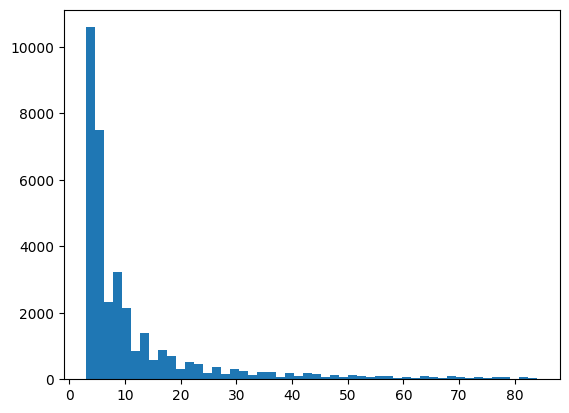

In [68]:
plt.hist(ingredients_counts, bins=50)

In [105]:
new_ingredients = {}
for key, value in ingredients.items():
    if value >= 100:
        new_ingredients[key] = value

print("Number of ingredients occuring at least 100 times:", len(new_ingredients))

Number of ingredients occuring at least 100 times: 3593


In [106]:
#sort new_ingredients by value
new_ingredients = dict(sorted(new_ingredients.items(), key=lambda item: item[1], reverse=False))

In [107]:
# print the first 100 items in new_ingredients
count = 0
for key, value in new_ingredients.items():
    print(f"{key}: {value}")
    count += 1
    if count >= 100:
        break

en:220: 100
en:acide-malique: 100
en:isolated-soy-protein-product: 100
en:cultured-celery-juice-powder: 100
en:cheddar-cheese-sauce: 100
en:turkey-thigh-meat: 100
en:milkcap: 100
en:tart-cherry: 100
en:karotten: 100
en:croscarmellose-sodium: 100
en:milcheiweiss: 100
en:2000-kcal: 100
en:dark-chocolate-contains-cocoa-solids: 101
en:b-carotene: 101
en:yellow-cornmeal: 101
en:cheddar-cheese-blend: 101
en:beef-collagen-casing: 101
en:cracked-rye: 101
en:high-oleic-oil: 101
en:poudre-d-ail: 101
en:poivre: 101
en:jodiertes-speisesalz: 101
en:poteter: 101
en:coco: 102
en:brie: 102
en:germinated-rice: 102
en:black-cardamom: 102
en:broad-leaved-endive: 102
en:retains-product-freshness: 102
en:natural-cocoa: 102
en:dimethyl-silicone: 102
en:natural-maple-flavouring: 102
en:cajun-seasoning: 102
en:black-tea-leaf: 102
en:contains-2-and-less-of-each: 102
en:natural-cinammon-flavouring: 102
en:of: 102
en:soluble-vegetable-fiber: 102
en:raclette: 102
en:pflanzliche-ole: 102
en:492: 102
en:ris: 102
en